<a href="https://colab.research.google.com/github/maniraj1234/MelanomaDetectionNN/blob/main/MelanomaDetection_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### Data is being committed in github repo, let's read it from there 

In [54]:
import zipfile
import os

In [55]:
!pip install tf-nightly

In [56]:
!wget --no-check-certificate \
    "https://github.com/maniraj1234/MelanomaDetectionNN/archive/refs/heads/main.zip" \
    -O "/tmp/melanomaDetection.zip"

--2022-11-16 16:31:57--  https://github.com/maniraj1234/MelanomaDetectionNN/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/maniraj1234/MelanomaDetectionNN/zip/refs/heads/main [following]
--2022-11-16 16:31:57--  https://codeload.github.com/maniraj1234/MelanomaDetectionNN/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.113.9
Connecting to codeload.github.com (codeload.github.com)|140.82.113.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/melanomaDetection.zip’

/tmp/melanomaDetect     [            <=>     ] 786.01M  23.7MB/s    in 36s     

2022-11-16 16:32:33 (21.8 MB/s) - ‘/tmp/melanomaDetection.zip’ saved [824195900]



In [57]:
%ls /tmp

MelanomaDetectionNN-main/
__autograph_generated_file5dufhwc5.py
__autograph_generated_file8f4fyk90.py
__autograph_generated_file_rjb3r_u.py
__autograph_generated_filex18aviy0.py
__autograph_generated_filey9rc8cab.py
__pycache__/
azureml-logs/
clr-debug-pipe-4434-12594-in|
clr-debug-pipe-4434-12594-out|
dotnet-diagnostic-4434-12594-socket=
melanomaDetection.zip
pyright-5287-3zBjIOE9SI3B/
pyright-5287-6n1vSknWYwfe/
python-languageserver-cancellation/
systemd-private-11b529d5e64c49daa763584c823a955d-earlyoom.service-Ot20Lg/


In [58]:

zip_ref = zipfile.ZipFile('/tmp/melanomaDetection.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [59]:
%ls /tmp

MelanomaDetectionNN-main/
__autograph_generated_file5dufhwc5.py
__autograph_generated_file8f4fyk90.py
__autograph_generated_file_rjb3r_u.py
__autograph_generated_filex18aviy0.py
__autograph_generated_filey9rc8cab.py
__pycache__/
azureml-logs/
clr-debug-pipe-4434-12594-in|
clr-debug-pipe-4434-12594-out|
dotnet-diagnostic-4434-12594-socket=
melanomaDetection.zip
pyright-5287-3zBjIOE9SI3B/
pyright-5287-6n1vSknWYwfe/
python-languageserver-cancellation/
systemd-private-11b529d5e64c49daa763584c823a955d-earlyoom.service-Ot20Lg/


### Importing all the important libraries

In [60]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [61]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [62]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
path_train_data = '/tmp/MelanomaDetectionNN-main/Skin cancer data/Train/'
path_test_data = '/tmp/MelanomaDetectionNN-main/Skin cancer data/Test/'
data_dir_train = pathlib.Path(path_train_data)
data_dir_test = pathlib.Path(path_test_data)

In [63]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [64]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [65]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",
    image_size=(img_height, img_width),
    seed = 123
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [66]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [67]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
    image_size=(img_height, img_width),
    seed = 123
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [68]:
val_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [69]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [70]:
num_classes = len(class_names)

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

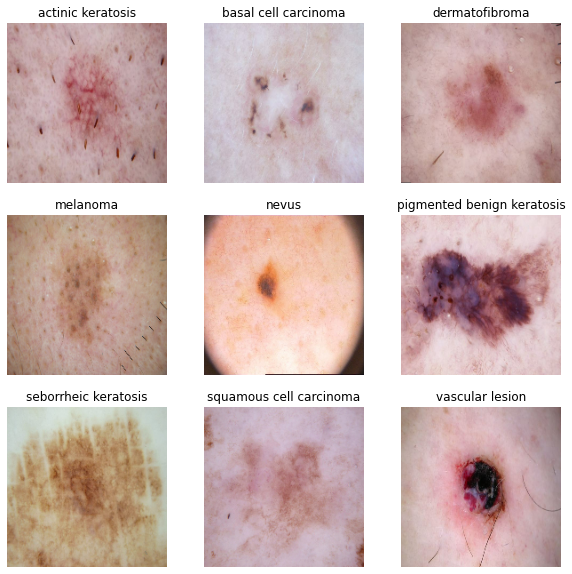

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
# Getting the image related to a specific class and plotting them 
for i in range(len(class_names)):
    filtered_ds = train_ds.filter(lambda x, l: tf.math.equal(l[0], i))
    for image, label in filtered_ds.take(1):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[0]])
        plt.axis('off')

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [72]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [73]:
### standardize data
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3))
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image)) 

0.0 0.90277785


In [21]:
model = Sequential([
  normalization_layer,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [22]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [24]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 67s 65ms/step - loss: 2.0720 - accuracy: 0.2461 - val_loss: 1.8703 - val_accuracy: 0.3736
Epoch 2/20
56/56 [==============================] - 2s 44ms/step - loss: 1.7416 - accuracy: 0.3800 - val_loss: 1.5085 - val_accuracy: 0.4855
Epoch 3/20
56/56 [==============================] - 2s 44ms/step - loss: 1.4733 - accuracy: 0.4838 - val_loss: 1.4538 - val_accuracy: 0.5078
Epoch 4/20
56/56 [==============================] - 2s 44ms/step - loss: 1.3748 - accuracy: 0.5145 - val_loss: 1.4093 - val_accuracy: 0.5168
Epoch 5/20
56/56 [==============================] - 2s 44ms/step - loss: 1.2606 - accuracy: 0.5480 - val_loss: 1.4161 - val_accuracy: 0.5280
Epoch 6/20
56/56 [==============================] - 2s 44ms/step - loss: 1.2049 - accuracy: 0.5753 - val_loss: 1.3

### Visualizing training results

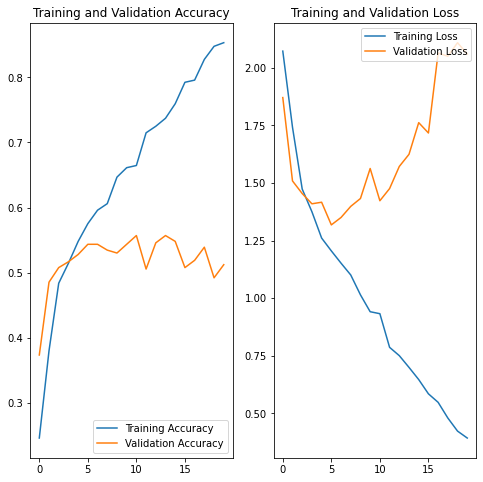

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Write your findings here
The above model is clearly an overfit, it is performing well on train data but not on validation data. and validation accuracy is around 54%

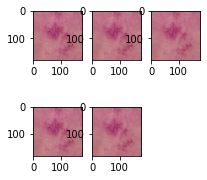

In [74]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.4)
])
aug_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))
image_batch, labels_batch = next(iter(aug_ds))
plt.figure(figsize=(3,5))
for i in range(5):
  ax = plt.subplot(3, 3, i+1)
  plt.imshow(data_augmentation(image_batch[1]).numpy().astype('uint8'))


In [28]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

### Todo:
### Create the model, compile and train the model


In [29]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
model2 = Sequential([
  normalization_layer,
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


### Compiling the model

In [30]:
### Todo, choose an appropirate optimiser and loss function
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [31]:
## Your code goes here
epochs = 20
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 7s 87ms/step - loss: 1.7822 - accuracy: 0.3532 - val_loss: 1.5171 - val_accuracy: 0.4698
Epoch 2/20
56/56 [==============================] - 4s 66ms/step - loss: 1.5050 - accuracy: 0.4855 - val_loss: 1.4483 - val_accuracy: 0.5324
Epoch 3/20
56/56 [==============================] - 4s 66ms/step - loss: 1.4585 - accuracy: 0.4816 - val_loss: 1.4196 - val_accuracy: 0.5101
Epoch 4/20
56/56 [==============================] - 4s 66ms/step - loss: 1.3848 - accuracy: 0.5061 - val_loss: 1.4547 - val_accuracy: 0.4810
Epoch 5/20
56/56 [==============================] - 4s 65ms/step - loss: 1.3376 - accuracy: 0.5285 - val_loss: 1.3618 - val_accuracy: 0.5369
Epoch 6/20
56/56 [==============================] - 4s 66ms/step - loss: 1.2740 - accuracy: 0.5463 - val_loss: 1.340

2022-11-16 11:52:15.259862: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8201
2022-11-16 11:52:15.529401: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


### Visualizing the results

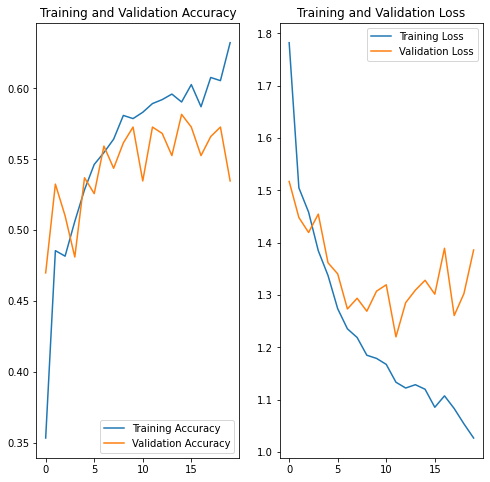

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### *Observations*: This model did not perform much better, it's an underfit. data augmentation chosen was leading to data loss. 

#### Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

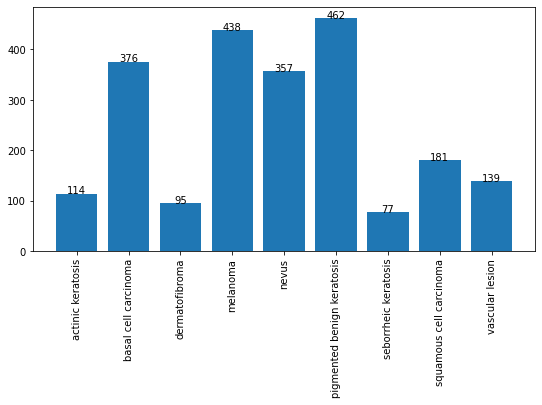

In [75]:
## Your code goes here.
import matplotlib.pyplot as plt
data = dict()

def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

# find count of all class types.
for i in range(num_classes):
    data[class_names[i]] = len(list(data_dir_train.glob(class_names[i]+'/*.jpg')))

fig = plt.figure()
fig.set_figwidth(num_classes)
fig.set_figheight(num_classes*0.5)

plt.xticks(rotation='vertical')
plt.bar(range(len(data)), list(data.values()), align='center')
add_labels(range(len(data)), list(data.values()))
plt.xticks(range(len(data)), list(data.keys()))
plt.show()

#### - Which class has the least number of samples?
##### seborrheic keratosis has the least samples with count of 77
#### - Which classes dominate the data in terms proportionate number of samples?
##### pigmented benign keratosis has highest number of samples with count of 462


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [27]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [76]:
import glob
path_list=[]
lesion_list=[]
for class_name in class_names:   
  for img_name in data_dir_train.glob(class_name+'/*.jpg'):
        path_list.append(str(img_name))
        lesion_list.append(class_name)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/tmp/MelanomaDetectionNN-main/Skin cancer data...,actinic keratosis
1,/tmp/MelanomaDetectionNN-main/Skin cancer data...,actinic keratosis
2,/tmp/MelanomaDetectionNN-main/Skin cancer data...,actinic keratosis
3,/tmp/MelanomaDetectionNN-main/Skin cancer data...,actinic keratosis
4,/tmp/MelanomaDetectionNN-main/Skin cancer data...,actinic keratosis
...,...,...
2234,/tmp/MelanomaDetectionNN-main/Skin cancer data...,vascular lesion
2235,/tmp/MelanomaDetectionNN-main/Skin cancer data...,vascular lesion
2236,/tmp/MelanomaDetectionNN-main/Skin cancer data...,vascular lesion
2237,/tmp/MelanomaDetectionNN-main/Skin cancer data...,vascular lesion


In [28]:
import Augmentor

path_to_training_dataset= path_train_data

for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4456D72640>: 100%|██████████| 500/500 [00:04<00:00, 122.22 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4456D293D0>: 100%|██████████| 500/500 [00:04<00:00, 120.71 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4419F96FA0>: 100%|██████████| 500/500 [00:04<00:00, 113.82 Samples/s]                  
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F4456E02940>: 100%|██████████| 500/500 [00:20<00:00, 24.02 Samples/s] 
Processing <PIL.Image.Image image mode=RGB size=964x672 at 0x7F4456E03CD0>: 100%|██████████| 500/500 [00:15<00:00, 32.11 Samples/s]                    
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4438095070>: 100%|██████████| 500/500 [00:03<00:00, 126.50 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F4419D1E940>: 100%|██████████

Initialised with 114 image(s) found.
Output directory set to /tmp/MelanomaDetectionNN-main/Skin cancer data/Train/actinic keratosis/output.Initialised with 376 image(s) found.
Output directory set to /tmp/MelanomaDetectionNN-main/Skin cancer data/Train/basal cell carcinoma/output.Initialised with 95 image(s) found.
Output directory set to /tmp/MelanomaDetectionNN-main/Skin cancer data/Train/dermatofibroma/output.Initialised with 438 image(s) found.
Output directory set to /tmp/MelanomaDetectionNN-main/Skin cancer data/Train/melanoma/output.Initialised with 357 image(s) found.
Output directory set to /tmp/MelanomaDetectionNN-main/Skin cancer data/Train/nevus/output.Initialised with 462 image(s) found.
Output directory set to /tmp/MelanomaDetectionNN-main/Skin cancer data/Train/pigmented benign keratosis/output.Initialised with 77 image(s) found.
Output directory set to /tmp/MelanomaDetectionNN-main/Skin cancer data/Train/seborrheic keratosis/output.Initialised with 181 image(s) found.
O

Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [77]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [78]:
import glob
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list[0]

'/tmp/MelanomaDetectionNN-main/Skin cancer data/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011012.jpg_100d0ff0-fd1a-4933-8318-101a42fc9128.jpg'

In [31]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
set(lesion_list_new)

{'actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion'}

In [79]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [80]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

/tmp/ipykernel_6444/390629722.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [81]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

####  Train the model on the data created using Augmentor

In [34]:
batch_size = 32
img_height = 180
img_width = 180

#### Create a training dataset

In [35]:
data_dir_train=path_train_data
train_ds_new = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### Create a validation dataset

In [36]:
val_ds_new = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### Create your model (make sure to include normalization)

In [37]:
## your code goes here
model3 = Sequential([
  normalization_layer,
  layers.SeparableConv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.SeparableConv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.SeparableConv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.SeparableConv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(num_classes, activation='softmax')
])

#### Compile your model (Choose optimizer and loss function appropriately)
Here adam is performing better than stochastic gradient descent. hence it performs better, adam optimizer is used.

In [38]:
## your code goes here
model3.compile(optimizer='adam',
            loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Train the model

In [39]:
epochs = 30
## Your code goes here, use 50 epochs.
history =  model3.fit(
  train_ds_new,
  validation_data=val_ds_new,
  epochs=epochs)

Epoch 1/30
169/169 [==============================] - 31s 172ms/step - loss: 2.3810 - accuracy: 0.3867 - val_loss: 12.1744 - val_accuracy: 0.1359
Epoch 2/30
169/169 [==============================] - 29s 169ms/step - loss: 1.2870 - accuracy: 0.5208 - val_loss: 23.4078 - val_accuracy: 0.1359
Epoch 3/30
169/169 [==============================] - 29s 169ms/step - loss: 0.9778 - accuracy: 0.6239 - val_loss: 18.1850 - val_accuracy: 0.1804
Epoch 4/30
169/169 [==============================] - 29s 169ms/step - loss: 0.8085 - accuracy: 0.6944 - val_loss: 1.1494 - val_accuracy: 0.6199
Epoch 5/30
169/169 [==============================] - 29s 173ms/step - loss: 0.5930 - accuracy: 0.7672 - val_loss: 0.6478 - val_accuracy: 0.7595
Epoch 6/30
169/169 [==============================] - 29s 169ms/step - loss: 0.4

/anaconda/envs/azureml_py38_PT_TF/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


#### **Todo:**  Visualize the model results

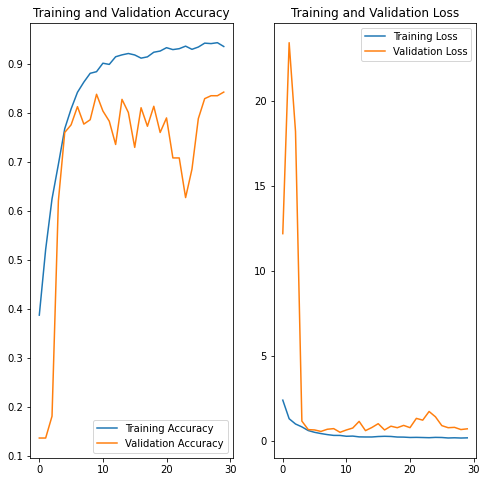

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Validate model against test data

In [41]:
testData = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    labels='inferred',
    label_mode='categorical',
     batch_size = batch_size,
    image_size=(img_height, img_width),seed = 123)


predictions = np.array([])
labels =  np.array([])
for x, y in testData:
  predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis=1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

cm = tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()
cm

Found 118 files belonging to 9 classes.
1/1 [==============================] - 0s 249ms/step


array([[ 1,  3,  0,  0, 10,  2,  0,  0,  0],
       [ 1,  5,  2,  1,  0,  4,  0,  3,  0],
       [ 2,  6,  1,  2,  2,  2,  0,  1,  0],
       [ 0,  0,  0,  4, 10,  2,  0,  0,  0],
       [ 0,  0,  0,  1, 14,  1,  0,  0,  0],
       [ 1,  2,  0,  1,  0, 10,  0,  2,  0],
       [ 0,  0,  0,  3,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  0,  4,  4,  0,  4,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2]], dtype=int32)

In [42]:
np.seterr(divide='ignore', invalid='ignore')
true_pos = np.diag(cm)
false_pos = np.sum(cm, axis=0) - true_pos
false_neg = np.sum(cm, axis=1) - true_pos
precision = np.sum(true_pos / (true_pos + false_pos))
recall = np.sum(true_pos / (true_pos + false_neg))
# f1_score = 
print('PRECISION: ',precision)
print('RECALL: ',recall)

PRECISION:  nan
RECALL:  3.1041666666666665


In [47]:
import numpy as np
sp = []
f1 = []
gm = []
sens = []
acc= []

for c in range(9):
    tp = cm[c,c]
    fp = sum(cm[:,c]) - cm[c,c]
    fn = sum(cm[c,:]) - cm[c,c]
    tn = sum(np.delete(sum(cm)-cm[c,:],c))

    recall = tp/(tp+fn)
    precision = tp/(tp+fp)
    accuracy = (tp+tn)/(tp+fp+fn+tn)
    specificity = tn/(tn+fp)
    f1_score = 2*((precision*recall)/(precision+recall))
    g_mean = np.sqrt(recall * specificity)
    sp.append(specificity)
    f1.append(f1_score)
    gm.append(g_mean)
    sens.append(recall)
    acc.append(accuracy)

    print("for class {}: recall {}, specificity {}\
          precision {}, f1 {}, gmean {}".format(c,round(recall,4), round(specificity,4), round(precision,4),round(f1_score,4),round(g_mean,4)))
print("sp: ", np.average(sp))
print("f1: ", np.average(f1))
print("gm: ", np.average(gm))
print("sens: ", np.average(sens))
print("accuracy: ", np.average(acc))

for class 0: recall 0.0625, specificity 0.951          precision 0.1667, f1 0.0909, gmean 0.2438
for class 1: recall 0.3125, specificity 0.8824          precision 0.2941, f1 0.303, gmean 0.5251
for class 2: recall 0.0625, specificity 0.9706          precision 0.25, f1 0.1, gmean 0.2463
for class 3: recall 0.25, specificity 0.9216          precision 0.3333, f1 0.2857, gmean 0.48
for class 4: recall 0.875, specificity 0.7451          precision 0.35, f1 0.5, gmean 0.8074
for class 5: recall 0.625, specificity 0.8431          precision 0.3846, f1 0.4762, gmean 0.7259
for class 6: recall 0.0, specificity 1.0          precision nan, f1 nan, gmean 0.0
for class 7: recall 0.25, specificity 0.9412          precision 0.4, f1 0.3077, gmean 0.4851
for class 8: recall 0.6667, specificity 0.9913          precision 0.6667, f1 0.6667, gmean 0.8129
sp:  0.9162451454011555
f1:  nan
gm:  0.4807289042916185
sens:  0.3449074074074074
accuracy:  0.8549905838041432


Accuracy obtained on test data is 85.5%

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Class rebalance helped to overcome the problem of underfitting. there is a significant increase in the validation accuracy close to 83%.
Also test accuracy is 85.5%


### Assumptions / Considerations:
1. Metric used here is accuracy as the aim is to classify the images accurately.
2. Loss function used is sparse categorical cross entropy that would ensure similar objects are classified into same class and objects from other classes are minimized.

### Summary:
Note: Various hyperparameters, models are being trained but to limit the notebook, limiting this to only the models that provide some insights of overfit, underfit, and best performance was observed in model3 with augmentator after class rebalance and normalization, dropouts are being used.
Some important observations:

1. Adam optimizer performed better than stochastic gradient descent.
2. Adding dropout and normalization helped to overcome the problem of overfit.
3. Adding more convolution layers / more channels increased the model complexity, run time & accuracy proportinately.
4. SeparableConv2D have improved the training time compared to the simple SeparableConv2D
5. Increasing the number of epochs is increasing the model accuracy.



Runtime used: Google colab, Azure ML studio notebook (python 3 ikernel)